Code imported from  
https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

In [16]:
from pydataset import data
import numpy as np
import pandas as pd

In [41]:
# Get the Housing data
df=data('Housing')
# Check the data
df.head().values

array([[42000.0, 5850, 3, 1, 2, 'yes', 'no', 'yes', 'no', 'no', 1, 'no'],
       [38500.0, 4000, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no'],
       [49500.0, 3060, 3, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no'],
       [60500.0, 6650, 3, 1, 2, 'yes', 'yes', 'no', 'no', 'no', 0, 'no'],
       [61000.0, 6360, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no']],
      dtype=object)

In [42]:
# Create dictionary to label 'yes' and 'no'
d=dict(zip(['no','yes'], range(0,2)))

for i in zip(df.dtypes.index, df.dtypes):
    if str(i[1])=='object':
        df[i[0]]=df[i[0]].map(d)

In [43]:
for i,j in enumerate(np.unique(pd.qcut(df['price'],3))):
    print(i,j)

0 (24999.999, 53000.0]
1 (53000.0, 74500.0]
2 (74500.0, 190000.0]


In [44]:
df['price']=pd.qcut(df['price'],3,labels=['0','1','2']).cat.codes

# Split into two sets
y=df['price']
X=df.drop('price',1)

In [45]:
# Bagging RandomForestlassifier at different subsmaples

# Bagging classifier at .1 subsamples


In [47]:
# Bagging RandomForestClassifier at different subsamples
# Bagging classifier at .1 subsamples
# Avg. Accuracy of: 0.641 (+/-) 0.080
# Bagging classifier at .3 subsamples
# Avg. Accuracy of: 0.650 (+/-) 0.091     # Better accuracy
# Bagging classifier at .5 subsamples
# Avg. Accuracy of: 0.639 (+/-) 0.091     # Worse accuracy

In [48]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

In [53]:
seed=1075
np.random.seed(seed)

# Create Classifiers
rf=RandomForestClassifier()
et=ExtraTreesClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rg=RidgeClassifier()

clf_array=[rf,et,knn,svc,rg]

for clf in clf_array:
    vanilla_scores=cross_val_score(clf,X,y,cv=10,n_jobs=-1)
    bagging_clf=BaggingClassifier(clf,
                                max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores=cross_val_score(bagging_clf, X,y,cv=10,n_jobs=-1)
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,
                                                            vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,
                                                                       bagging_scores.mean(),
                                                                       bagging_scores.std()))

Mean of: 0.643, std: (+/-) 0.095 [RandomForestClassifier]
Mean of: 0.654, std: (+/-) 0.077 [Bagging RandomForestClassifier]

Mean of: 0.634, std: (+/-) 0.084 [ExtraTreesClassifier]
Mean of: 0.652, std: (+/-) 0.086 [Bagging ExtraTreesClassifier]

Mean of: 0.500, std: (+/-) 0.086 [KNeighborsClassifier]
Mean of: 0.535, std: (+/-) 0.111 [Bagging KNeighborsClassifier]

Mean of: 0.561, std: (+/-) 0.079 [SVC]
Mean of: 0.575, std: (+/-) 0.078 [Bagging SVC]

Mean of: 0.639, std: (+/-) 0.050 [RidgeClassifier]
Mean of: 0.597, std: (+/-) 0.045 [Bagging RidgeClassifier]



In [54]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)

# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()

clf_array = [rf, et, knn, svc, rg]

for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=10, 
       n_jobs=-1)
    
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n"
                       .format(clf.__class__.__name__, 
                        bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.649, std: (+/-) 0.086 [RandomForestClassifier]
Mean of: 0.654, std: (+/-) 0.077 [Bagging RandomForestClassifier]

Mean of: 0.643, std: (+/-) 0.087 [ExtraTreesClassifier]
Mean of: 0.652, std: (+/-) 0.086 [Bagging ExtraTreesClassifier]

Mean of: 0.500, std: (+/-) 0.086 [KNeighborsClassifier]
Mean of: 0.535, std: (+/-) 0.111 [Bagging KNeighborsClassifier]

Mean of: 0.561, std: (+/-) 0.079 [SVC]
Mean of: 0.575, std: (+/-) 0.078 [Bagging SVC]

Mean of: 0.639, std: (+/-) 0.050 [RidgeClassifier]
Mean of: 0.597, std: (+/-) 0.045 [Bagging RidgeClassifier]



Let's Vote = How Do you Voting

In [55]:
# Example of hard voting
from sklearn.ensemble import VotingClassifier

clf=[rf,et,knn,svc,rg]
eclf=VotingClassifier(estimators=[('Random Forests',rf), ('Extra Trees',et),
                                 ('KNeighbors',knn),('SVC',svc),('Ridge Classifier',rg)],voting='hard')

for clf,label in zip([rf,et,knn,svc,rg,eclf],
                    ['Random Forest','Extra Trees','KNeighbors','SVC','Ridge Classifier','Ensemble']):
    scores=cross_val_score(clf,X,y,cv=10,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(),label))
    

Accuracy: 0.65 (+/- 0.09) [Random Forest]
Accuracy: 0.64 (+/- 0.08) [Extra Trees]
Accuracy: 0.50 (+/- 0.09) [KNeighbors]
Accuracy: 0.56 (+/- 0.08) [SVC]
Accuracy: 0.64 (+/- 0.05) [Ridge Classifier]
Accuracy: 0.63 (+/- 0.09) [Ensemble]


Decision Boundaries

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs=gridspec.GridSpec(3,3)

fig=plt.figure(figsize=(14,12))

labels=['Random Forest','Extra Trees','KNN','Support Vector','Ridge Reg.','Ensemble']

for clf,lab,grd in zip([rf,et,knn, svc,rg,eclf],
                      labels,
                      itertools.product([0,1,2],repeat=2)):
    

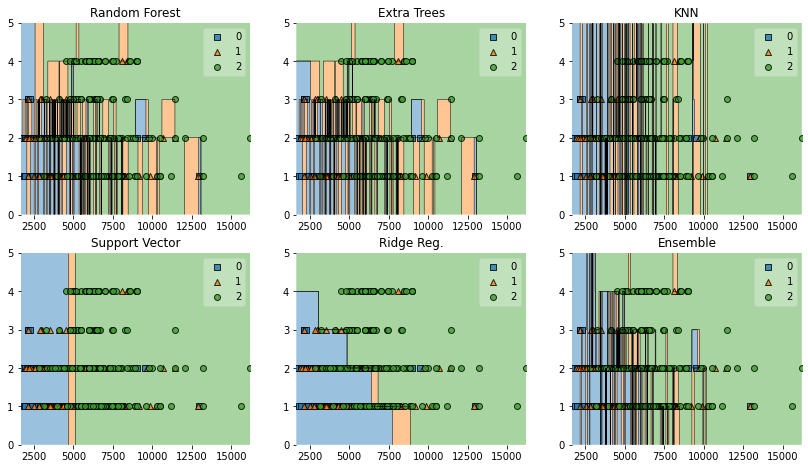

In [58]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(14, 12))
labels = ['Random Forest', 'Extra Trees', 'KNN', 'Support Vector',
          'Ridge Reg.', 'Ensemble']
for clf, lab, grd in zip([rf, et, knn, svc, rg, eclf], 
                         labels,
                         itertools.product([0, 1, 2], repeat = 2)):
    clf.fit(X[['lotsize', 'stories']], y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X[['lotsize', 'stories']]), 
                                y=np.array(y), clf=clf)
    plt.title(lab)